In [5]:
import json
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
url = "https://quote.cnbc.com/quote-html-webservice/quote.htm"

params = {
    "noform": "1",
    "partnerId": "2",
    "fund": "1",
    "exthrs": "0",
    "output": "json",
    "symbolType": "issue",
    "symbols": "5093148|5093149|5093150|15183113|5093151|5093158|5093159|19892965|5093160|135058359|5093168",
    "requestMethod": "extended",
}

user_agent = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.127 Safari/537.36'
referer = 'https://google.com'
headers = {'user-agent': user_agent, 'referer': referer}

data = requests.get(url, headers=headers, params=params).json()
lst_symbol = []
lst_yield = []

for i in data["ExtendedQuoteResult"]["ExtendedQuote"]:
    lst_symbol.append(i["QuickQuote"]["symbol"])
    lst_yield.append(i["QuickQuote"]["last"])

data_dct = {'Symbol': lst_symbol, 'Yield': lst_yield}
data_df = pd.DataFrame(data_dct)
data_df    

,Symbol,Yield
0,US1M,0.325
1,US3M,0.838
2,US6M,1.386
3,US1Y,2.004
4,US2Y,2.641
5,US3Y,2.799
6,US5Y,2.87
7,US7Y,2.891
8,US10Y,2.851
9,US20Y,3.116


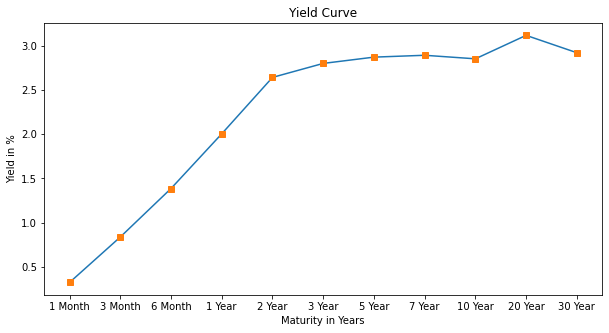

In [48]:
maturity_lst = ['1 Month', '3 Month', '6 Month', '1 Year', '2 Year', '3 Year', '5 Year', '7 Year', '10 Year', '20 Year', '30 Year']
xpoints = np.arange(11)
ypoints = data_df['Yield'].tolist()
ypoints = [float(i) for i in ypoints]
plt.figure(figsize=(10,5))
plt.xticks(xpoints, maturity_lst)
plt.yticks(np.arange(0, max(ypoints)+1, 0.5))
plt.plot(xpoints, ypoints)
plt.plot(ypoints, "s")
plt.title('Yield Curve')
plt.xlabel('Maturity in Years')
plt.ylabel('Yield in %')
plt.show()